In [28]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
path = 'CarPrice_Assignment.csv'
df = pd.read_csv(path)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [6]:
encoding = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df = encoding

In [7]:
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


split the data to test and train

In [8]:
df.dtypes

car_ID               int64
symboling            int64
wheelbase          float64
carlength          float64
carwidth           float64
                    ...   
fuelsystem_idi       int64
fuelsystem_mfi       int64
fuelsystem_mpfi      int64
fuelsystem_spdi      int64
fuelsystem_spfi      int64
Length: 191, dtype: object

In [9]:
df.describe(include="all")

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
target = "price"
x = df.drop(columns=[target])
y = df[target].astype(float)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    df, y,test_size=0.2, random_state=42 , stratify=None)

x_train.shape, x_test.shape

((164, 191), (41, 191))

In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


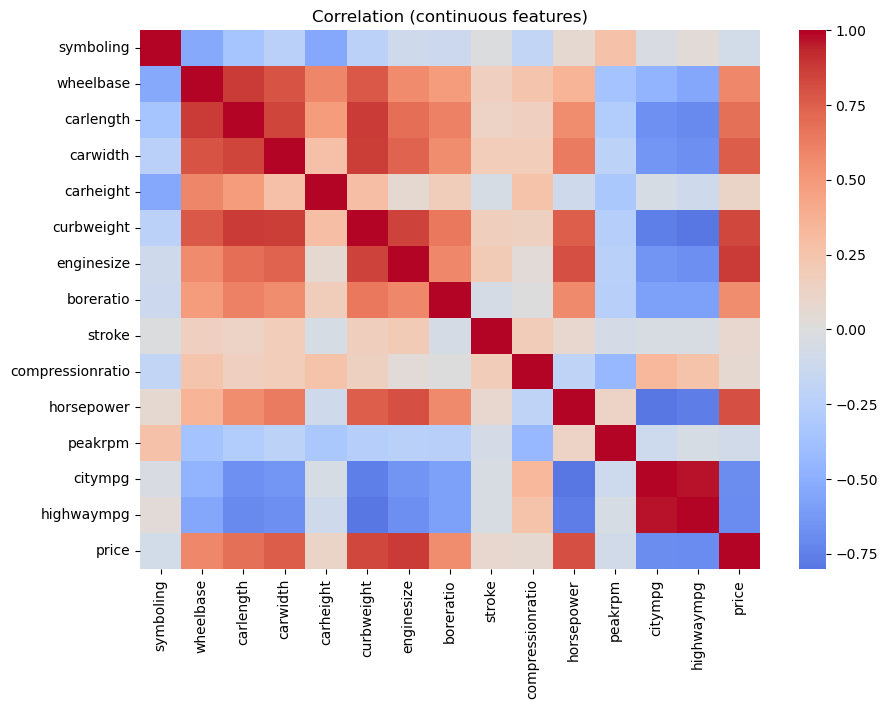

In [14]:
cont_cols = [c for c in df.select_dtypes(include=[float, int]).columns
             if df[c].nunique() > 2 and not c.lower().endswith("_id")]

plt.figure(figsize=(10,7))
sns.heatmap(df[cont_cols].corr(numeric_only=True),
            cmap="coolwarm", center=0, annot=False)
plt.title("Correlation (continuous features)")
plt.show()

In [15]:
y_predection = model.predict(x_test)
mse  = mean_squared_error(y_test, y_predection)
rmse = np.sqrt(mse)
print(f"coefficients: {model.coef_}") #the (_) is mean private variable and this not functions
print(f"intercept: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"r-squared: {r2_score(y_test,y_predection):.2f}")
print(f"number of feature: {model.n_features_in_}")
print(f"RMSE: {rmse:.3f}")

coefficients: [-1.13353771e-13 -1.31561428e-12 -7.18807652e-12  2.60355106e-12
 -3.32993268e-12  7.79443632e-12  5.18585825e-14  4.63223643e-13
  1.78277030e-11 -1.19671854e-11  1.33938863e-11 -5.48959858e-13
 -2.32529721e-14  2.21872271e-12 -1.88316584e-12  1.00000000e+00
  3.47106013e-11 -1.11817640e-11 -7.27249984e-12 -7.55677293e-12
 -6.72293173e-12 -1.21279850e-11 -1.28969221e-11 -6.01393393e-20
  3.96806363e-11  3.34932471e-11 -7.29280838e-11 -7.73028944e-11
  4.20128342e-19 -1.99899776e-19 -1.12970466e-10  3.26954718e-19
  3.38813179e-21  9.99498878e-20 -1.45689667e-19 -2.34098888e-11
 -9.01912020e-12 -1.08473970e-11 -3.69929968e-11  2.54109884e-20
  2.91849660e-11  2.56212353e-11  4.18771586e-11  4.78084574e-11
  1.15196481e-19  3.18240519e-11 -3.99368966e-12  2.31940951e-11
 -2.98875330e-11  3.45268659e-11  3.37205067e-11 -2.67622134e-11
  1.87327942e-11 -6.31254495e-12 -1.09823173e-11  7.32376694e-11
  2.42955092e-12 -1.81925060e-11  1.27638365e-11 -4.51274749e-11
  4.3469858

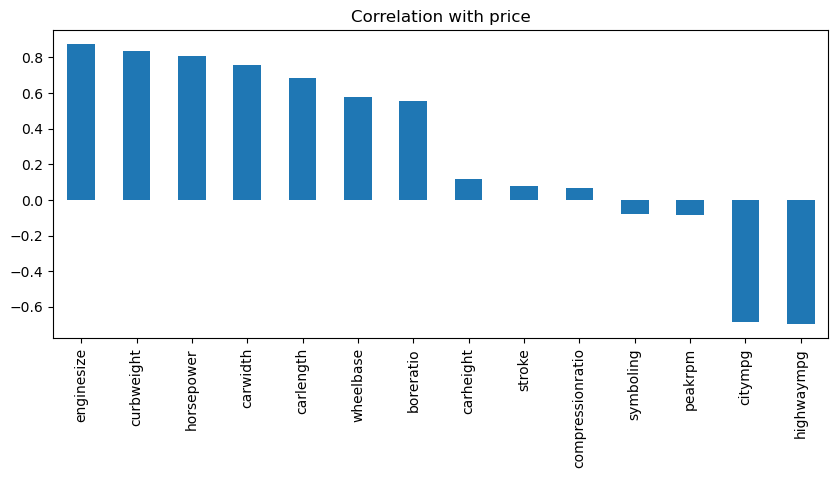

In [16]:
cont_cols_t = [c for c in cont_cols if c != target]
corr_to_y = df[cont_cols_t].corrwith(df[target]).sort_values(ascending=False)

corr_to_y.plot.bar(figsize=(10,4))
plt.title(f"Correlation with {target}")
plt.show()

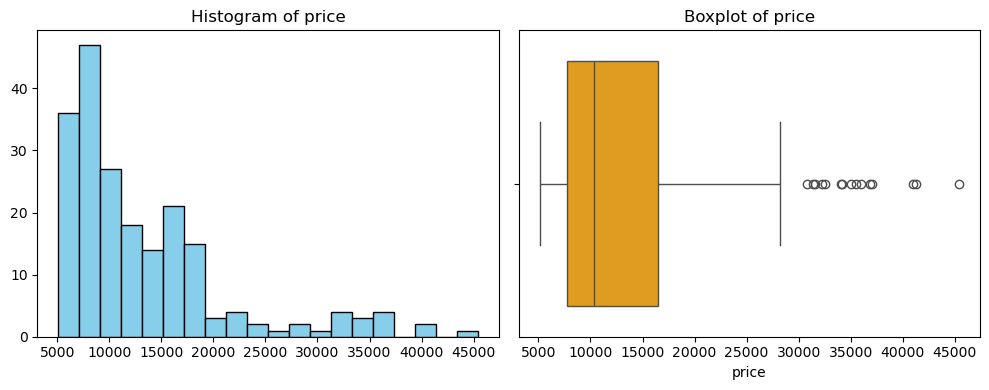

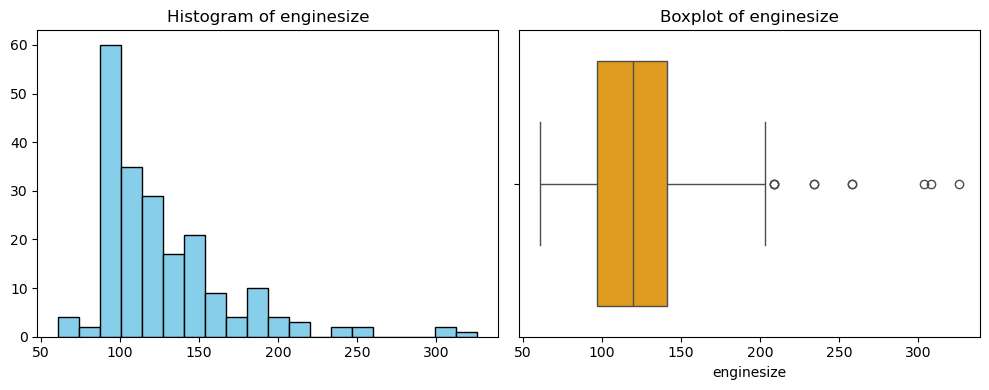

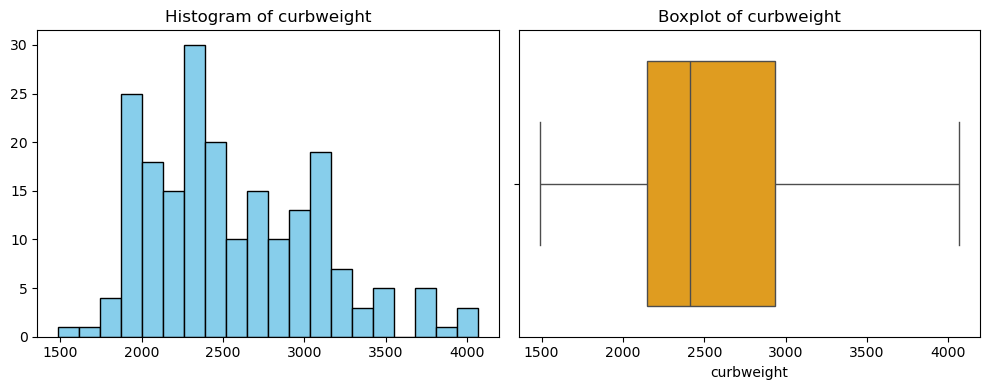

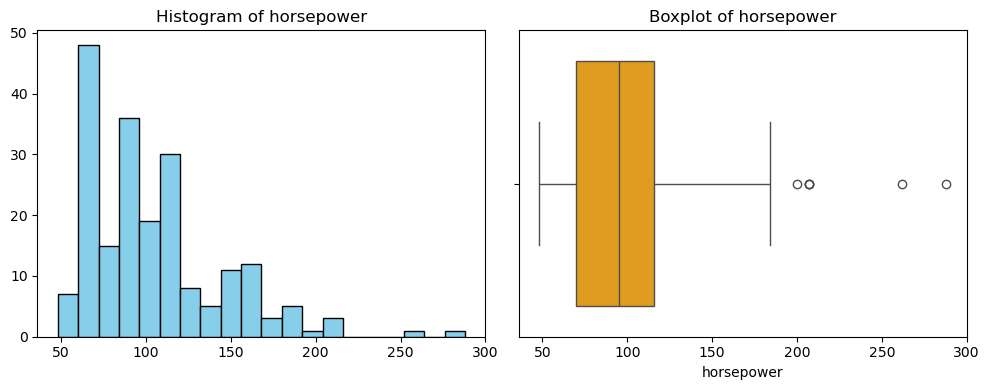

In [17]:
for col in ['price', 'enginesize', 'curbweight', 'horsepower']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

## Model Development and Comparison

In [19]:
X = pd.get_dummies(x, drop_first=True, dtype=int)

In [20]:
print(X.dtypes)

car_ID               int64
symboling            int64
wheelbase          float64
carlength          float64
carwidth           float64
                    ...   
fuelsystem_idi       int64
fuelsystem_mfi       int64
fuelsystem_mpfi      int64
fuelsystem_spdi      int64
fuelsystem_spfi      int64
Length: 190, dtype: object


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [26]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "RMSE": rmse, "R2 Score": r2}

results = []
results.append(evaluate_model(y_test, y_pred_lin, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
results.append(evaluate_model(y_test, y_pred_lasso, "Lasso Regression"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

results_df = pd.DataFrame(results)
print(results_df)

               Model          RMSE  R2 Score
0  Linear Regression  13295.115526 -1.239056
1   Ridge Regression   2986.418471  0.887025
2   Lasso Regression   6625.636192  0.443922
3      Random Forest   1911.177090  0.953732


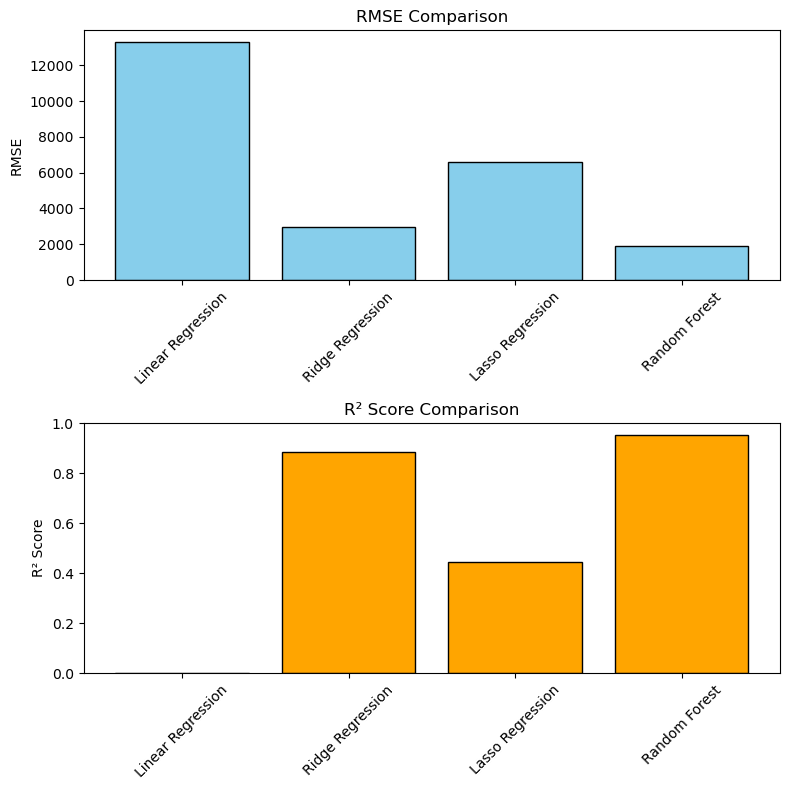

In [31]:
plt.figure(figsize=(8, 8))

# Plot RMSE
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue', edgecolor='black')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Plot R2 Score
plt.subplot(2, 1, 2)  # 2nd plot
plt.bar(results_df['Model'], results_df['R2 Score'], color='orange', edgecolor='black')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
y_pred = model.predict(X_test)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

Coefficients: [ 2.26486650e+02  1.27888993e+03  9.73233863e+01 -2.46443151e+02
  8.40035706e+02 -4.02452633e+02  1.75440551e+01 -1.08124265e+01
 -4.06532200e+03 -5.82403650e+02 -7.89842409e+02 -1.96326235e+01
  2.48510771e+00  3.96198604e+02 -2.28838018e+02  2.21889782e+04
  1.89715993e+04  2.17501127e+04  2.22510705e+04  2.40269162e+03
  3.69938177e+03  2.92754246e+03 -1.35869413e-08  5.77823589e+03
  2.72357951e+04  4.06167940e+04  3.92235476e+04  3.90218702e-09
  2.38023858e-08  3.65579525e+04  1.96778274e-08  3.41160558e-08
  1.50985215e-08 -3.87424279e-08  1.67148230e+03  1.46020064e+04
 -3.27798621e+03 -5.14523316e+03 -5.42650014e-09  1.29236814e+04
  1.16423568e+04  1.30724869e+04  8.62120044e+03 -1.07766027e-08
  1.02988985e+04  5.52717592e+03  1.33428970e+04  1.43529932e+04
  9.63342888e+03  1.08111944e+04  1.40145389e+04  1.08116971e+04
  1.22556516e+04  1.16770480e+04  6.82799714e+03  1.34796489e+04
  1.35681219e+04  1.12890310e+04  1.22944933e+04  8.32972920e+03
  1.4024408